In [108]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Cleaned_Online_Cars_Sale_Marketplace.csv')

df.head()

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,...,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
0,2019,Toyota,Sienna SE,Used,39998,4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup...,3.3,...,Black,Front-wheel Drive,19,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403
1,2018,Ford,F-150 Lariat,Used,49985,4.8,817,Dealer,Giant Chevrolet,4.8,...,Black,Four-wheel Drive,19,24,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929
2,2017,RAM,1500 Laramie,Used,41860,4.7,495,Dealer,Gill Auto Group Madera,4.6,...,Black,Four-wheel Drive,15,21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G,23173
3,2021,Honda,Accord Sport SE,Used,28500,5.0,36,Dealer,AutoSavvy Las Vegas,4.6,...,–,Front-wheel Drive,29,35,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC Turbo,1HGCV1F49MA038035,54237,10598
4,2020,Lexus,RX 350,Used,49000,4.8,76,Dealer,Lexus of Henderson,4.8,...,Birch,Front-wheel Drive,20,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,2T2AZMAA8LC156270,HDT4181A,28137


In [110]:
df['SellerName'].value_counts().head(5)

SellerName
EchoPark Automotive Greenville                        33
EchoPark Automotive Salt Lake City Delivery Center    31
Autos of Dallas                                       27
Principle Volvo Cars San Antonio                      23
Mungenast St. Louis Honda                             17
Name: count, dtype: int64

In [112]:
high_mileage_cars = df[df['Mileage'] > 100000]
count_high_mileage_cars = high_mileage_cars.shape[0]

print(f'Number of cars with mileage over 100k: {count_high_mileage_cars}')

Number of cars with mileage over 100k: 184


In [114]:
newer_cars = df[df['Year'] > 2020][['Year', 'Make', 'Model', 'Price']]
print(newer_cars)

      Year    Make                       Model   Price
3     2021   Honda             Accord Sport SE   28500
8     2021   Honda   Pilot Touring 8-Passenger   44299
17    2021  Subaru           Crosstrek Premium   25500
21    2021   Acura                  RDX A-Spec   37000
22    2021   Acura                  RDX A-Spec   38000
...    ...     ...                         ...     ...
8446  2021   Honda                   CR-V EX-L   37890
8450  2021   Acura                  TLX A-Spec   45998
8456  2021    Land            Rover Defender X  105991
8460  2021  Subaru  Ascent Limited 7-Passenger   43000
8464  2021   Honda           Accord Sport 1.5T   29500

[1329 rows x 4 columns]


In [116]:
top_five_makes = df['Make'].value_counts().head(5)
print("Top five car makes:")
print(top_five_makes)

Top five car makes:
Make
BMW              841
Mercedes-Benz    736
Toyota           715
Honda            636
Ford             534
Name: count, dtype: int64


In [118]:
num_listings = df.shape[0]

print(f'The number of listings in the dataset is: {num_listings}')

The number of listings in the dataset is: 8474


In [120]:
count_5_rated_cars = df[df['ConsumerRating'] == 5.0].shape[0]
print(f'Number of cars with a customer rating of 5.0: {count_5_rated_cars}')

Number of cars with a customer rating of 5.0: 309


In [122]:
popular_cars = df.groupby('Make').size().sort_values(ascending=False)

print(popular_cars.head(10))

Make
BMW              841
Mercedes-Benz    736
Toyota           715
Honda            636
Ford             534
Jeep             457
Lexus            445
Chevrolet        385
Audi             374
Subaru           277
dtype: int64


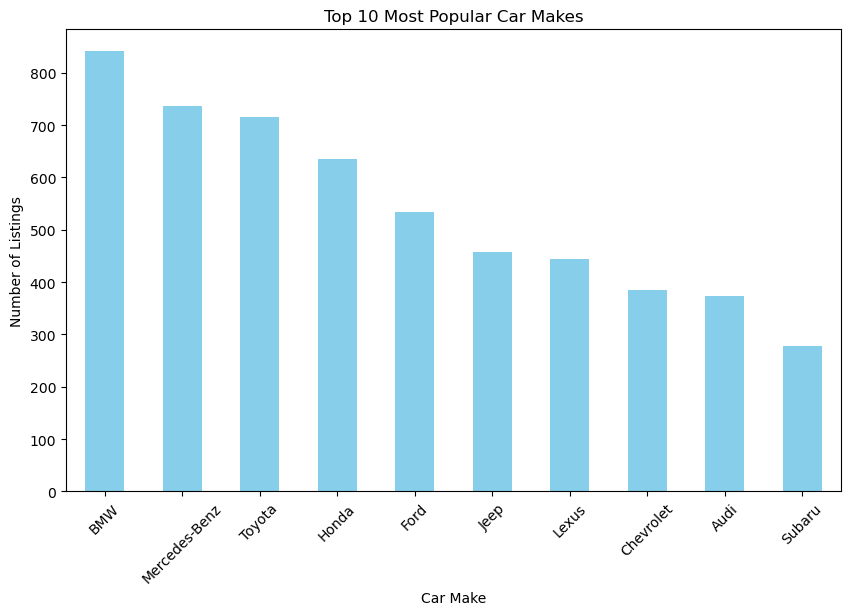

In [124]:
popular_cars.head(10).plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Top 10 Most Popular Car Makes')
plt.xlabel('Car Make')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

In [127]:
df['Price'] = df['Price'].astype(str)
df['Price'] = df['Price'].str.replace(r'[$,]', '', regex=True)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df = df.dropna(subset=['Price'])

print(df['Price'].head())

0    39998
1    49985
2    41860
3    28500
4    49000
Name: Price, dtype: int64


In [129]:
df['Used/New'] = df['Used/New'].str.replace('certified', 'Certified', case=False)


In [131]:
df = df[df['Drivetrain'] != '-']

In [133]:
df = df.dropna(subset=['Mileage'])

bins = [0, 20000, 50000, 100000, 150000, float('inf')]
labels = ['0-20k', '20k-50k', '50k-100k', '100k-150k', '150k+']
df['Mileage Bracket'] = pd.cut(df['Mileage'], bins=bins, labels=labels)

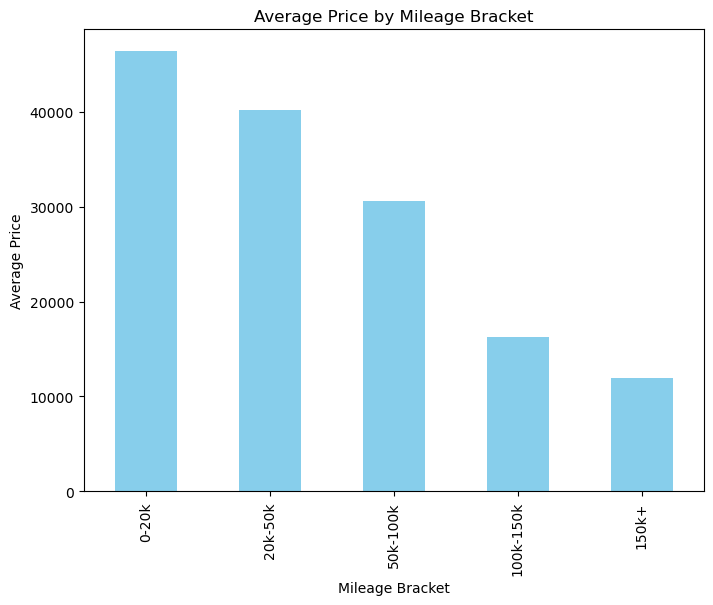

In [135]:
avg_price_by_mileage = df.groupby('Mileage Bracket', observed=True)['Price'].mean()

avg_price_by_mileage.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Average Price by Mileage Bracket')
plt.xlabel('Mileage Bracket')
plt.ylabel('Average Price')
plt.show()

In [137]:
mileage_summary = df.groupby('Mileage Bracket', observed=True)['Price'].describe()
print(mileage_summary)

                  count          mean           std     min       25%  \
Mileage Bracket                                                         
0-20k            2628.0  46385.815068  25627.762113  8000.0  32994.25   
20k-50k          4154.0  40185.187530  17530.699068  5995.0  29996.25   
50k-100k         1508.0  30648.018568  12006.711112  3999.0  22572.00   
100k-150k         153.0  16259.941176   8063.749276  2300.0   9995.00   
150k+              31.0  11962.774194   6512.650724  3995.0   6245.00   

                     50%       75%       max  
Mileage Bracket                               
0-20k            41000.0  51991.25  449996.0  
20k-50k          36498.0  45987.25  349995.0  
50k-100k         29147.0  37461.00  115998.0  
100k-150k        15295.0  19989.00   42900.0  
150k+             8800.0  16977.50   25000.0  


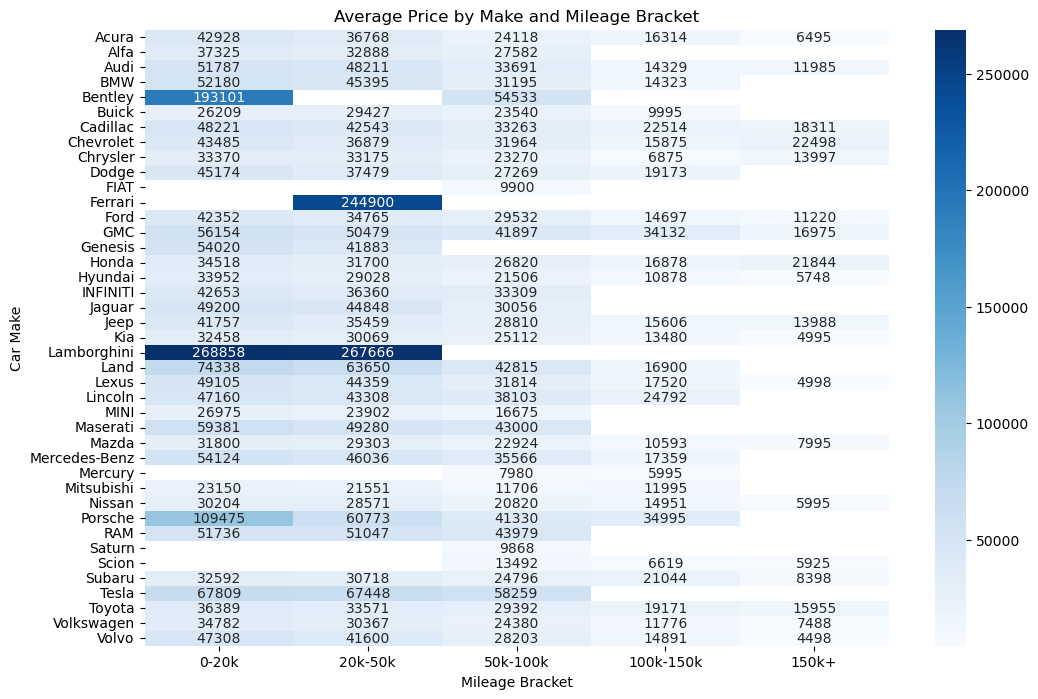

In [139]:
price_by_make_mileage = df.groupby(['Make', 'Mileage Bracket'], observed=True)['Price'].mean().unstack()

import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(price_by_make_mileage, cmap='Blues', annot=True, fmt='.0f')
plt.title('Average Price by Make and Mileage Bracket')
plt.xlabel('Mileage Bracket')
plt.ylabel('Car Make')
plt.show()


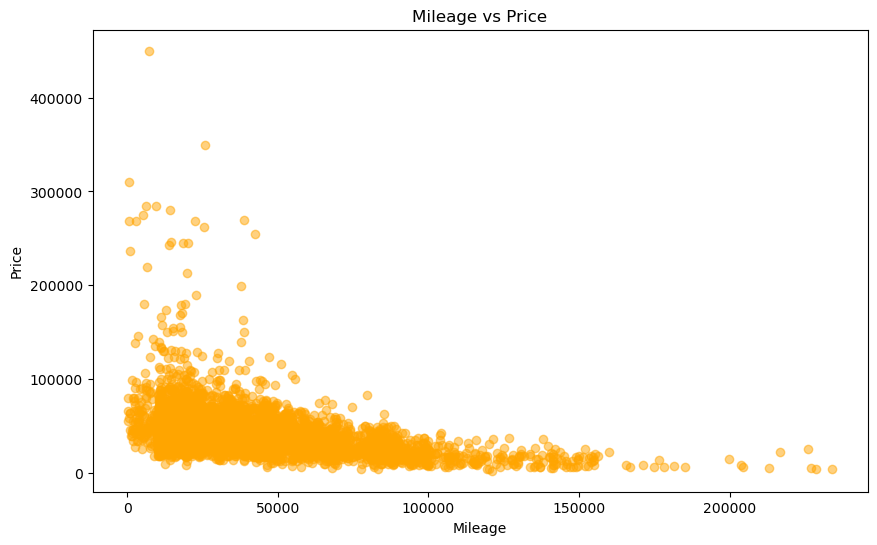

In [141]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Mileage'], df['Price'], alpha=0.5, color='orange')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()
